## <center>Universidade Estadual de Campinas <br/>Instituto de Computação<br/><br/>Introdução às Metodologias para Elaboração de Projeto de Pesquisa (MO911)<br/><br/>Professor: Sandro Rigo<center/>

### Trabalho 3<br/><br/>Nome: Guilherme Monteiro Oliveira - 108318

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from math import sqrt


%matplotlib inline

In [2]:
blood_pres = pd.read_csv('Data/bp.csv')

In [3]:
measures =  pd.read_csv('Data/paired.csv')

In [4]:
blood_pres.head()

,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No


In [5]:
measures.head()

,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5


In [6]:
blood_pres.dtypes

bp       int64
type    object
dtype: object

In [7]:
measures.dtypes

Clone        object
August      float64
November    float64
dtype: object

### Pressão Sanguínea

In [8]:
blood_press_yes = blood_pres[blood_pres['type'] == 'Yes']['bp']
blood_press_no = blood_pres[blood_pres['type'] == 'No']['bp']

In [9]:
stat, p = stats.ttest_ind(blood_press_yes, blood_press_no)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=3.001, p=0.003
Probably different distributions


In [10]:

stat, p = stats.ranksums(blood_press_yes, blood_press_no)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


stat=3.046, p=0.002
Probably different distributions


In [11]:
bp_statistics = blood_pres.groupby(by = ['type']).agg(['mean', 'median', 'std'])

In [12]:
bp_statistics.loc['Dif'] = bp_statistics.loc['Yes'] - bp_statistics.loc['No']

In [13]:
bp_statistics

bp                  
           mean median        std
type                             
No    69.545455   70.0  11.083557
Yes   74.588235   76.0  11.583874
Dif    5.042781    6.0   0.500316

In [14]:
blood_press_yes

1       70
5       76
9       78
10      40
12      60
      ... 
187     62
189    102
192     48
196     68
199     62
Name: bp, Length: 68, dtype: int64

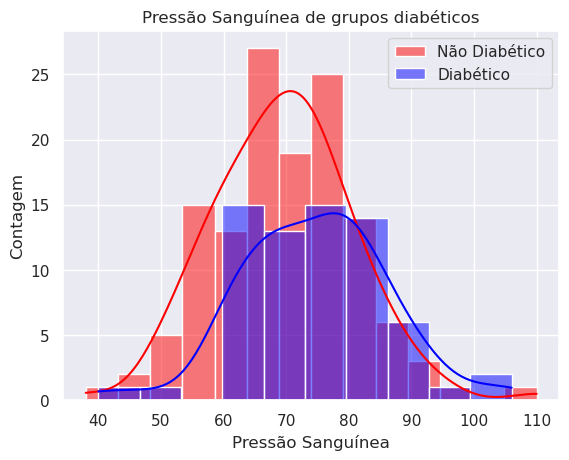

In [15]:
sns.set(style="darkgrid")

sns.histplot(data=blood_pres[blood_pres['type'] == 'No'], x="bp", color="red", label="Não Diabético", kde=True)
sns.histplot(data=blood_pres[blood_pres['type'] == 'Yes'], x="bp", color="blue", label="Diabético", kde=True)

plt.xlabel('Pressão Sanguínea')
plt.ylabel('Contagem')
plt.title('Pressão Sanguínea de grupos diabéticos')


plt.legend() 
plt.show()



### Paired

In [16]:
measures

,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5
5,Unal,8.3,15.5
6,Columbia_River,18.3,12.7
7,Fritzi_Pauley,13.3,11.1
8,Trichobel,7.9,19.9
9,Gaver,8.1,20.4


In [17]:
stat, p = stats.ttest_rel(measures.August, measures.November)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-2.309, p=0.040
Probably different distributions


In [18]:

stat, p = stats.wilcoxon(measures.August, measures.November)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=16.000, p=0.040
Probably different distributions


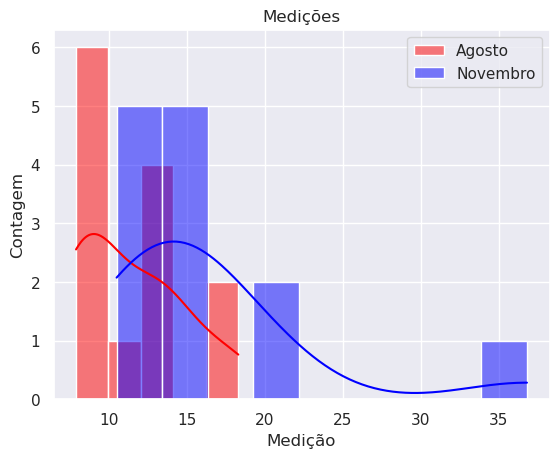

In [19]:
sns.set(style="darkgrid")

sns.histplot(data=measures, x="August", color="red", label="Agosto", kde=True)
sns.histplot(data=measures, x="November", color="blue", label="Novembro", kde=True)

plt.xlabel('Medição')
plt.ylabel('Contagem')
plt.title('Medições')


plt.legend() 
plt.show()

### Bootstrap

In [20]:
(blood_press_no,)

(0      68
 2      82
 3      76
 4      60
 6      58
        ..
 193    68
 194    74
 195    58
 197    70
 198    58
 Name: bp, Length: 132, dtype: int64,)

In [21]:
bootstrap_bp_yes = stats.bootstrap((blood_press_yes,), np.mean, confidence_level=0.95, random_state=123, method='BCa')

print("O intevalo de confiância para diabéticos é de {0[0]} até {0[1]}.".format(bootstrap_bp_yes.confidence_interval))

O intevalo de confiância para diabéticos é de 71.79411764705883 até 77.26470588235294.


In [22]:
bootstrap_bp_no = stats.bootstrap((blood_press_no,), np.mean, confidence_level=0.95, random_state=123, method='BCa')

print("O intevalo de confiância para os não diabéticos é de {0[0]} até {0[1]}.".format(bootstrap_bp_no.confidence_interval))

O intevalo de confiância para os não diabéticos é de 67.63636363636364 até 71.39812100396162.


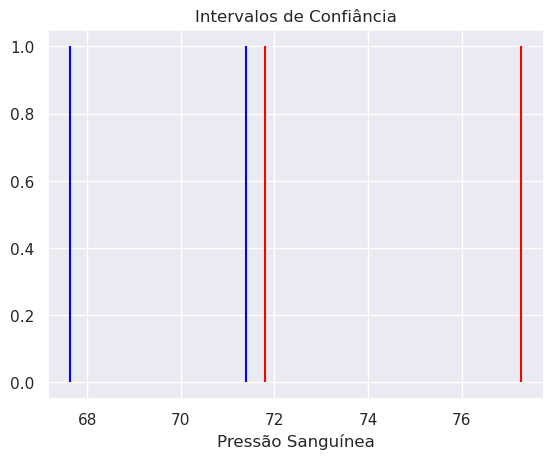

In [23]:
fig, ax = plt.subplots()

ax.vlines(bootstrap_bp_yes.confidence_interval, 0, 1, colors = 'red')
ax.vlines(bootstrap_bp_no.confidence_interval, 0, 1, colors = 'blue')

plt.title('Intervalos de Confiância')
plt.xlabel('Pressão Sanguínea')

plt.show()

### Cohen D

In [24]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

np.random.seed(1)


In [25]:
cohend(blood_press_no, blood_press_yes)

-0.4480342648766951